In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data_by_genres_o.csv')

In [3]:
data.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [4]:
data.describe()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


# Checking correlation between features

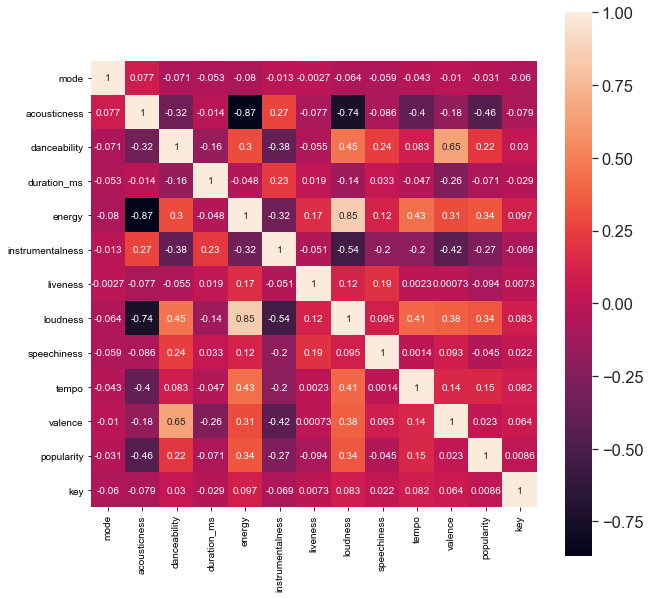

In [5]:
fig = plt.subplots (figsize = (10,10))
sns.set (font_scale = 1.5)
sns.heatmap (data.corr (), square = True, cbar = True, annot = True, annot_kws = {'size': 10})
plt.show ()

# Getting rid of redudant features

In [6]:
y = data['popularity']
genres = data['genres']
data = data.drop(['popularity', 'key', 'mode', 'genres'], axis = 1)
x = data.iloc[:, :]

# Looking at the clusters formed by the relationship btw popularity and features

10


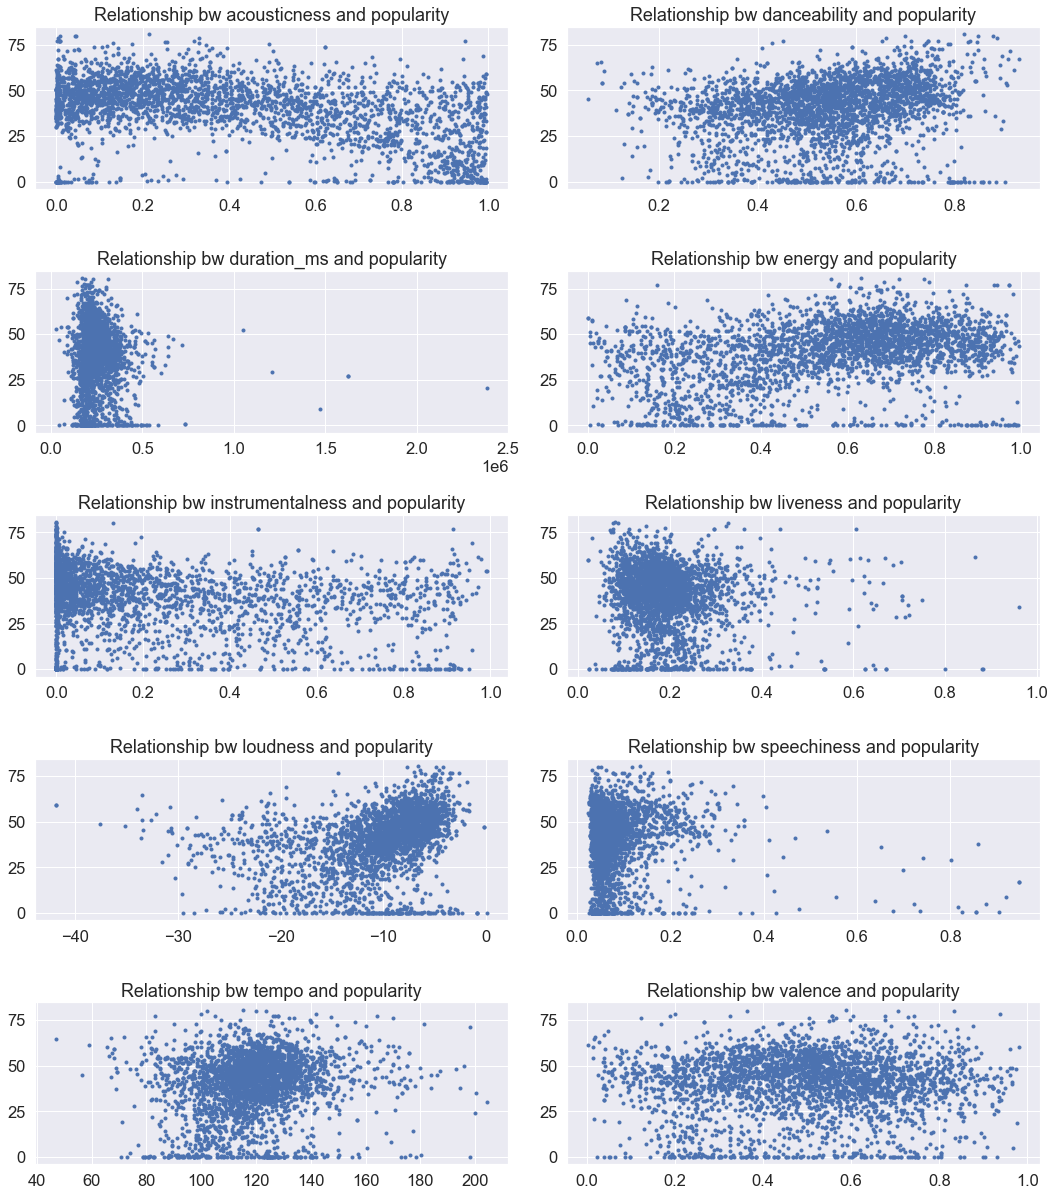

In [7]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(15, 20))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(6,2,i)
        plt.plot(x[col], y,marker='.',linestyle='none')
        plt.title(title % (col))
        plt.tight_layout()
col_names = x.columns
plotFeatures(col_names,"Relationship bw %s and popularity")

In [8]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x)

x = pd.DataFrame(scaler.transform(x))
x = pd.DataFrame(scaler.transform(x))

In [9]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Plotting a graph to figure out the ideal K value

In [10]:
k_range = range(1,10)
distortions1 = []
distortions = []
for i in k_range:
    kmeanModel = KMeans(n_clusters = i)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
    
    distortions1.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis =1))/x.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method using distance')

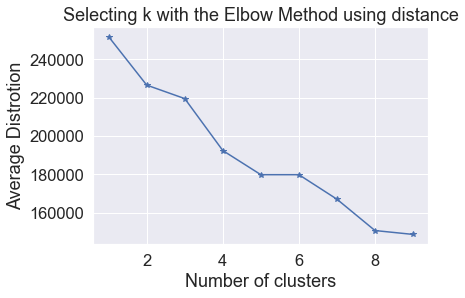

In [11]:
fig1 = plt.figure()
ex = fig1.add_subplot(111)
ex.plot(k_range, distortions1, 'b*-')
plt.xlabel("Number of clusters")
plt.ylabel("Average Distrotion")
plt.title("Selecting k with the Elbow Method using distance")

# Implementing the Kmeans algorithm

In [12]:
km_mod = KMeans(n_clusters= 6)

In [13]:
km_mod.fit(x)

KMeans(n_clusters=6)

In [14]:
pred = km_mod.predict(x)

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score

k_range = range(2,10)
for i in k_range:
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(cluster_labels)

[0 0 0 ... 0 1 0]
[0 1 1 ... 1 0 1]
[3 1 1 ... 1 0 1]
[3 4 2 ... 2 0 2]
[5 0 2 ... 2 3 5]
[1 5 0 ... 0 2 1]
[3 0 5 ... 5 2 3]
[4 3 2 ... 2 0 1]


In [16]:
frame = pd.DataFrame(x)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    1310
5     724
4     575
1     285
3      59
2      20
Name: cluster, dtype: int64

### We have made 6 new groups and assigned each genre a bigger group from which users could get recommended a new sub genre

# Finalized Dataset with a new group feature added

In [17]:
data['group'] = x['cluster']
data['genres'] = genres

In [18]:
data

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,group,genres
0,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,5,21st century classical
1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,4,432hz
2,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,0,8-bit
3,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,5,[]
4,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,0,a cappella
...,...,...,...,...,...,...,...,...,...,...,...,...
2968,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,0,zolo
2969,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,0,zouglou
2970,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,0,zouk
2971,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,1,zurich indie


# Recommending a user new music based on previous listening habbits

In [19]:
user = data.sample(n = 5)

In [20]:
user

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,group,genres
1252,0.404667,0.553542,278032.500000,0.571833,0.013768,0.220125,-7.869625,0.040908,110.674875,0.663579,0,gypsy punk
1474,0.005563,0.432676,267983.620370,0.898250,0.031076,0.221102,-4.897898,0.106596,140.595139,0.469794,5,j-metal
2948,0.027916,0.565535,238974.827393,0.817262,0.030038,0.220270,-6.042354,0.130025,126.603281,0.501530,5,wrestling
2711,0.038896,0.558222,182012.655123,0.835551,0.000009,0.178885,-4.661095,0.086607,128.635342,0.667212,0,texas pop punk
1850,0.491167,0.785167,187229.166667,0.625500,0.002167,0.075667,-5.258667,0.105983,107.362167,0.675667,0,musica canaria


In [22]:
condition = user['group'].mode()

In [23]:
condition

0    0
dtype: int32

## Recommending the user 5 new genres they could check out

In [24]:
recommend = pd.DataFrame(data[data.group == condition[0]].sample(n = 5).genres)

In [25]:
recommend

,genres
2134,piano rock
159,australian hip hop
2668,synth funk
420,canadian children's music
2679,taiwan pop
